<a href="https://colab.research.google.com/github/ni-ela/python-projects-collection/blob/master/analise_de_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**estudo de análise de Dados com Python: uso de dataframe e bibliotecas como pandas, sqlite, matplitlib e seaborn**

*Daniela Ferreira Feitosa*


In [ ]:
# Instalacao das libs
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conecta com um banco
conexao = sqlite3.connect('dados_vendas.db')

# Cria um cursor
cursor = conexao.cursor()

# Cria uma tabela
cursor.execute('''
CREATE TABLE vendas1 (
id_venda INTEGER PRIMARY KEY AUTOINCREMENT,
data_venda DATE,
produto TEXT,
categoria TEXT,
valor_venda REAL
)
''')

# Insere dados na tabela
cursor.execute('''
INSERT INTO vendas1 (data_venda, produto, categoria, valor_venda) VALUES
('2023-01-01', 'Produto A', 'Eletrônicos', 1500.00),
('2023-01-05', 'Produto B', 'Roupas', 350.00),
('2023-02-10', 'Produto C', 'Eletrônicos', 1200.00),
('2023-03-15', 'Produto D', 'Livros', 200.00),
('2023-03-20', 'Produto E', 'Eletrônicos', 800.00),
('2023-04-02', 'Produto F', 'Roupas', 400.00),
('2023-05-05', 'Produto G', 'Livros', 150.00),
('2023-06-10', 'Produto H', 'Eletrônicos', 1000.00),
('2023-07-20', 'Produto I', 'Roupas', 600.00),
('2023-08-25', 'Produto J', 'Eletrônicos', 700.00),
('2023-09-30', 'Produto K', 'Livros', 300.00),
('2023-10-05', 'Produto L', 'Roupas', 450.00),
('2023-11-15', 'Produto M', 'Eletrônicos', 900.00),
('2023-12-20', 'Produto N', 'Livros', 250.00);
''')

# Salva as alterações
conexao.commit()

OperationalError: table vendas1 already exists

    id_venda  data_venda    produto    categoria  valor_venda
0          1  2023-01-01  Produto A  Eletrônicos       1500.0
1          2  2023-01-05  Produto B       Roupas        350.0
2          3  2023-02-10  Produto C  Eletrônicos       1200.0
3          4  2023-03-15  Produto D       Livros        200.0
4          5  2023-03-20  Produto E  Eletrônicos        800.0
5          6  2023-04-02  Produto F       Roupas        400.0
6          7  2023-05-05  Produto G       Livros        150.0
7          8  2023-06-10  Produto H  Eletrônicos       1000.0
8          9  2023-07-20  Produto I       Roupas        600.0
9         10  2023-08-25  Produto J  Eletrônicos        700.0
10        11  2023-09-30  Produto K       Livros        300.0
11        12  2023-10-05  Produto L       Roupas        450.0
12        13  2023-11-15  Produto M  Eletrônicos        900.0
13        14  2023-12-20  Produto N       Livros        250.0


mes
2023-01    1850.0
2023-02    1200.0
2023-03    1000.0
2023-04   

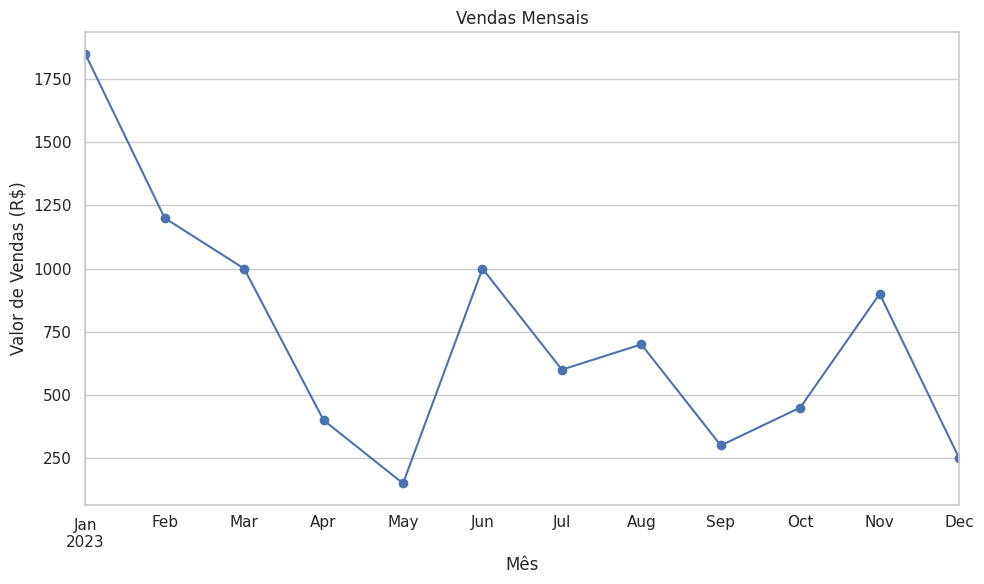

<ipython-input-14-2e0d39aa63df>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria', y='valor_venda', data=total_por_categoria, palette='viridis')


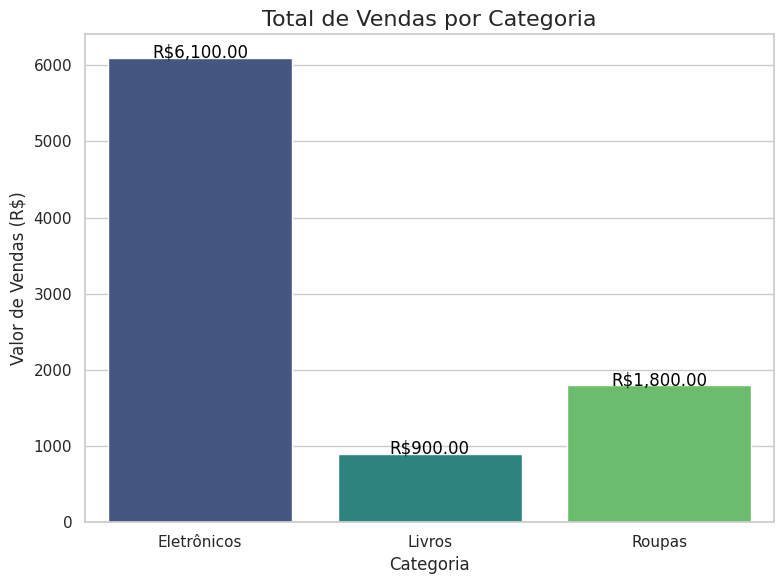

In [ ]:

# Cria um DataFrame a partir dos dados da tabela vendas1
df_vendas = pd.read_sql_query('SELECT * FROM vendas1', conexao)

# Exibe o DataFrame
print(df_vendas)

print("\n")

# Pandas -> Análise de Vendas Mensais
df_vendas['data_venda'] = pd.to_datetime(df_vendas['data_venda'])
df_vendas['mes'] = df_vendas['data_venda'].dt.to_period('M')
vendas_mensais = df_vendas.groupby('mes')['valor_venda'].sum()
print(vendas_mensais)


# Matplotlib -> Tendência de vendas mensais ao longo do tempo
vendas_mensais = df_vendas.groupby('mes')['valor_venda'].sum()

plt.figure(figsize=(10,6))
vendas_mensais.plot(kind='line', marker='o')
plt.title('Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Valor de Vendas (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Seaborn -> Total de vendas por categoria
total_por_categoria = df_vendas.groupby('categoria')['valor_venda'].sum().reset_index()

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras
plt.figure(figsize=(8,6))
sns.barplot(x='categoria', y='valor_venda', data=total_por_categoria, palette='viridis')

# Adicionar títulos e labels
plt.title('Total de Vendas por Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Valor de Vendas (R$)', fontsize=12)

# Mostrar os valores acima das barras
for index, row in total_por_categoria.iterrows():
    plt.text(index, row.valor_venda, f'R${row.valor_venda:,.2f}', color='black', ha="center")

plt.tight_layout()
plt.show()


# Fecha a conexão
conexao.close()